# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [216]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
import scipy as scipy
%matplotlib inline

### Step 2: Read in your data set 

In [217]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [218]:
df_raw.shape

(400, 4)

Answer: 400 observations

In [219]:
df_raw

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [220]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer:  400 observations

#### Question 2. Create a summary table

In [221]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The scale of GRE score and GPA is different; GRE test scores has a minimum of 220 and a max of 800, while GPA is at a 0 to 4 scale.

#### Question 4. Drop data points with missing data


In [222]:
data_clean = df_raw[df_raw.notnull().all(axis=1)]
data_clean.shape

(397, 4)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: see if there are nulls in my new data frame. See below:

In [223]:
data_clean.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 6. Create box plots for GRE and GPA

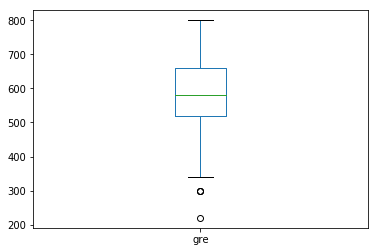

In [224]:
data_clean[["gre"]].plot(kind = 'box')

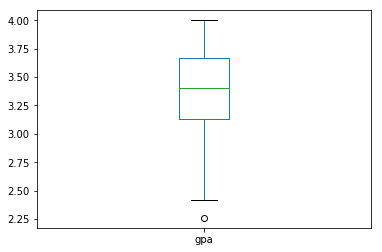

In [225]:
data_clean[["gpa"]].plot(kind = 'box')

#### Question 7. What do this plots show?

Answer: min, max, 1st quantile, median, 3rd quantile, max, and outliers.

#### Question 8. Describe each distribution 

#### for GPA:

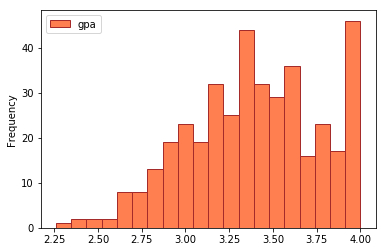

In [64]:
data_clean[["gpa"]].plot(kind = 'hist', bins = 20, edgecolor = 'brown', color = 'coral')

Most students have a gpa between 3.00 to 3.75, however there are also many students with gpa close to 4.00. Verify below: 

In [106]:
data_clean['gpa'].value_counts().sort_values(ascending = False).head(10)

4.00    28
3.31     8
3.15     7
3.35     7
3.40     7
3.45     7
2.98     6
3.63     6
3.13     5
3.17     5
Name: gpa, dtype: int64

It turns out there are 28 students that has a 4.0. 

Moreover the shape of the distribution is asymmetric, it is skewed to the left, where the mean < median.

#### for GRE:

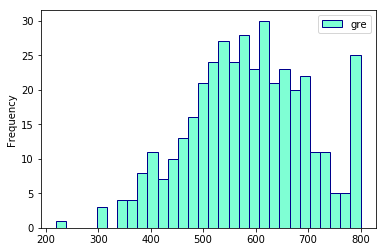

In [107]:
data_clean[["gre"]].plot(kind = 'hist', bins=30, edgecolor='darkblue', color = 'aquamarine')

Most students have a GRE score between 500 to 700; however, it looks like there are many that scored close to 800. This distribution more symmentrical than GPA, but still slightly right skewed.

In [211]:
data_clean['gre'].value_counts().sort_values(ascending = False).head(20)

620.0    30
580.0    28
540.0    27
800.0    25
560.0    24
520.0    24
600.0    23
660.0    23
700.0    22
500.0    21
640.0    21
680.0    20
480.0    16
460.0    13
740.0    11
720.0    11
400.0    11
440.0    10
380.0     8
420.0     7
Name: gre, dtype: int64



#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [109]:
data_clean[['gre']].describe()

,gre
count,397.000000
mean,587.858942
std,115.717787
min,220.000000
25%,520.000000
50%,580.000000
75%,660.000000
max,800.000000


Answer: No, the requirement would not be met. A normal distribution is a true symmetric, bell-shaped distribution. But the distribution of gpa and gre scores are not symmetrical, and both have long tails.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, if our model assumption demands normality. To transform data to normality, there are a few ways:
- use log transformation
- Box-Cox power transformation

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


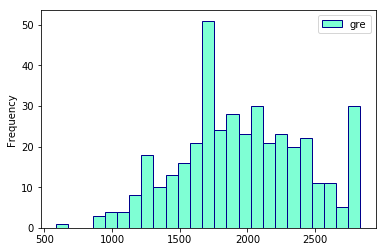

In [213]:
#using boxcox to tranform and then plot it out:
def boxcox(x):
    x = scipy.stats.boxcox(x)
    return x[0]
#plot the transformed data
data_boxcox = data_clean['gre_boxcox'] = data_clean[["gre"]].apply(boxcox)
data_boxcox.plot(kind = 'hist', bins=25, edgecolor='darkblue', color = 'aquamarine')

#### Question 11. Which of our variables are potentially colinear? 

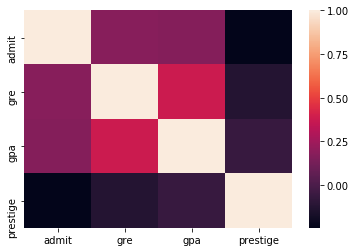

In [226]:
# create a correlation matrix for the data
sns.heatmap(data_clean.corr())

In [227]:
data_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer:  there doesn't seems to be colinearity between variables; for colinearity, the correlation between two variables would be close to 1, but looking at the data, there doesn't seem to be a correlation between variables that high.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

#### Question 14. What is your hypothesis? 

Answer: The probability of admit goes up as the ranking of prestige decreases.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [160]:
df_clean2 = df_raw.dropna(how='any')

In [163]:
#Check to see if we get the same results as before:
df_clean2.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### 2. Bonus: Log transform the skewed data

In [169]:
#log transform
data_clean['gre'].apply(np.log)

0      5.940171
1      6.492240
2      6.684612
3      6.461468
4      6.253829
5      6.633318
6      6.327937
7      5.991465
8      6.291569
9      6.551080
10     6.684612
11     6.086775
12     6.633318
13     6.551080
14     6.551080
15     6.173786
16     6.659294
17     5.886104
18     6.684612
19     6.291569
20     6.214608
21     6.492240
22     6.396930
23     6.522093
24     6.633318
25     6.684612
26     6.429719
27     6.253829
28     6.659294
29     6.253829
         ...   
370    6.291569
371    6.522093
372    6.522093
373    6.429719
374    6.327937
375    6.327937
376    6.429719
377    6.684612
378    6.461468
379    6.291569
380    6.551080
381    6.291569
382    6.291569
383    6.492240
384    6.173786
385    6.040255
386    6.606650
387    6.363028
388    6.461468
389    6.461468
390    6.684612
391    6.492240
392    6.396930
393    6.429719
394    6.131226
395    6.429719
396    6.327937
397    6.131226
398    6.551080
399    6.396930
Name: gre, Length: 397, 

#### 3. Advanced: Impute missing data

In [196]:
#impute the data with mean
data_clean3 = df_raw.fillna(df_raw.mean(),inplace = True)

In [191]:
#the rows where there are nulls
raw_nulls = df_raw[df_raw.isnull().any(axis=1)].index
df_raw.iloc[raw_nulls]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [199]:
#see if the data is imputed successfully
print 'mean gre', df_raw['gre'].mean()
print 'mean gpa', df_raw['gpa'].mean()
print 'mean prestige', df_raw['prestige'].mean()

mean gre 588.040201005
mean gpa 3.39092964824
mean prestige 2.48621553885
     admit         gre      gpa  prestige
187      0  588.040201  3.39093  2.000000
212      0  588.040201  2.87000  2.000000
236      1  660.000000  3.39093  2.486216


In [198]:
data_clean3.iloc[raw_nulls]

,admit,gre,gpa,prestige
187,0,588.040201,3.39093,2.000000
212,0,588.040201,2.87000,2.000000
236,1,660.000000,3.39093,2.486216
